### Data Visualization 


In [1]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import time
import re
import string
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import hamming_loss
import scipy
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading required libraries

#### Features and Labels


In [2]:
shortX = pd.read_csv("/Users/anuradha/Desktop/ML_Project/Movie-Genre-Prediction/imdbmovies/features.csv")
genre = pd.read_csv("/Users/anuradha/Desktop/ML_Project/Movie-Genre-Prediction/imdbmovies/labels.csv")
fullX = pd.read_csv("/Users/anuradha/Desktop/ML_Project/Movie-Genre-Prediction/imdbmovies/features_vectorized.csv")
words50X = pd.read_csv("/Users/anuradha/Desktop/ML_Project/Movie-Genre-Prediction/imdbmovies/vectorization50.csv", header=None)
labelsY = pd.read_csv("/Users/anuradha/Desktop/ML_Project/Movie-Genre-Prediction/imdbmovies/labels.csv")

#### Word Cloud

World clouds based on Genre (Drama, Romance and Comedy) which are genres with more frequency of occurence in the current dataset

#### Based on Drama

Drama


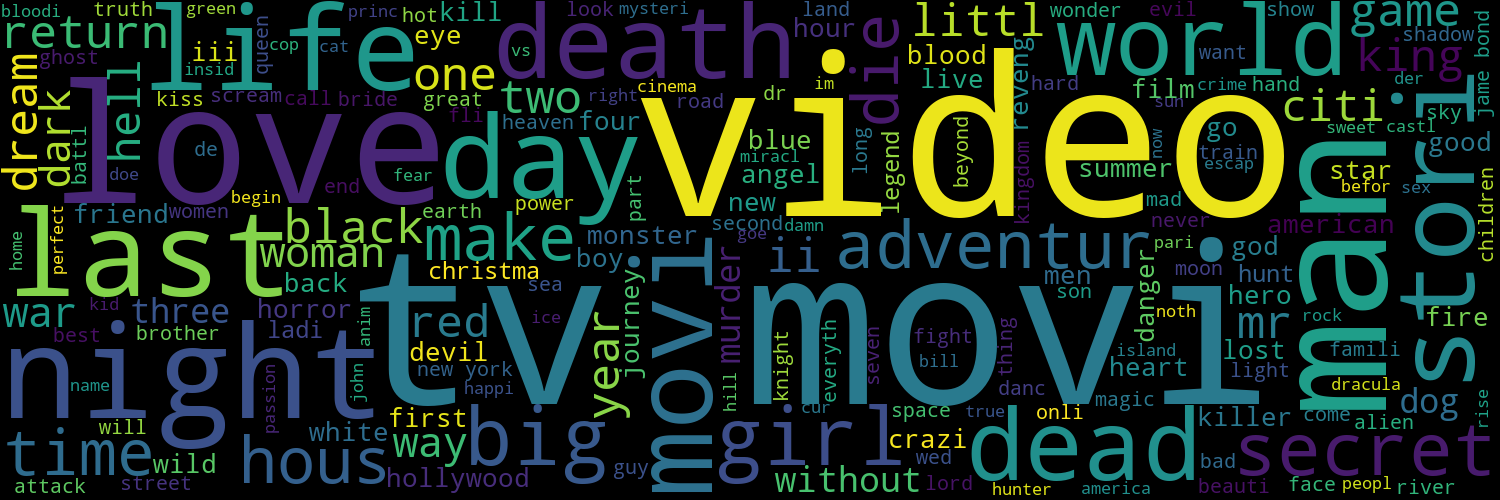

In [8]:
word_cloud=pd.concat([shortX['title'], genre['Drama']], axis=1)
movies_for_wordcloud = word_cloud[word_cloud.Drama != 0]
values = " ".join(map(str, (word_cloud["title"].tolist())))
print("Drama")
WordCloud(stopwords=STOPWORDS,width=1500,height=500).generate(values).to_image()

#### Based on Comedy

Comedy


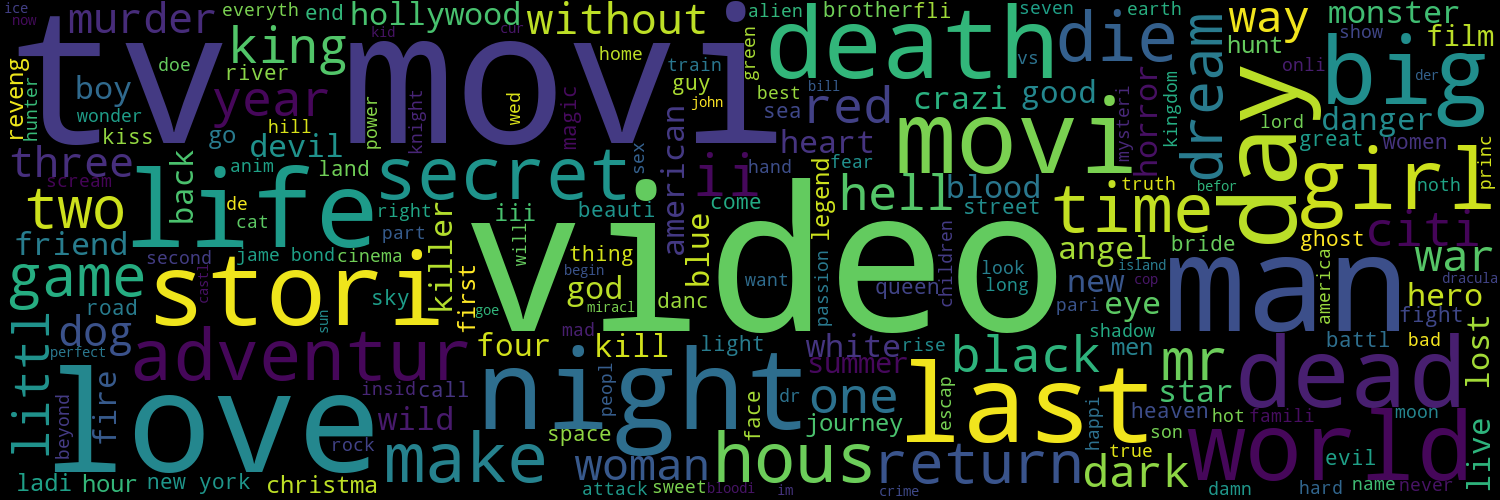

In [9]:
word_cloud=pd.concat([shortX['title'], genre['Comedy']], axis=1)
movies_for_wordcloud = word_cloud[word_cloud.Comedy != 0]
values = " ".join(map(str, (word_cloud["title"].tolist())))
print("Comedy")
WordCloud(stopwords=STOPWORDS,width=1500,height=500).generate(values).to_image()

#### Based on Romance

Romance


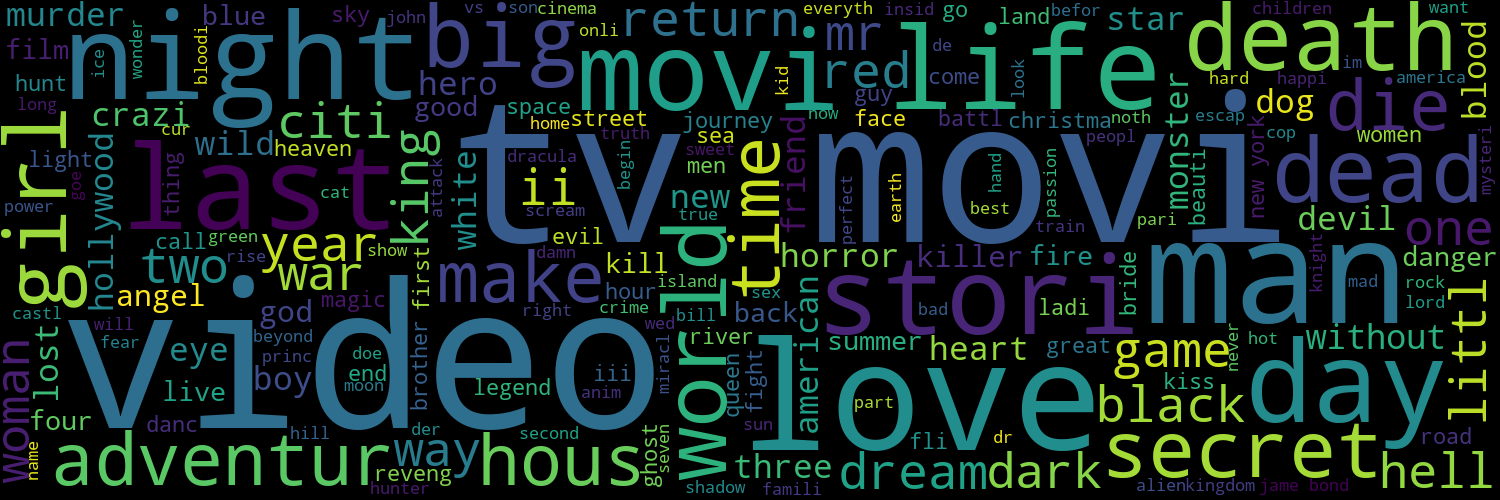

In [10]:
word_cloud=pd.concat([shortX['title'], genre['Romance']], axis=1)
movies_for_wordcloud = word_cloud[word_cloud.Romance != 0]
values = " ".join(map(str, (word_cloud["title"].tolist())))
print("Romance")
WordCloud(stopwords=STOPWORDS,width=1500,height=500).generate(values).to_image()

#### Genre Fequency

Plotting a bar graph based which shows genre vs their frequency of occurence in the current dataset

Frequency Caluclation:-

In [11]:
genre.columns
frequency = {}
for i in genre.columns.values:
    frequency[i] = sum(genre[i])


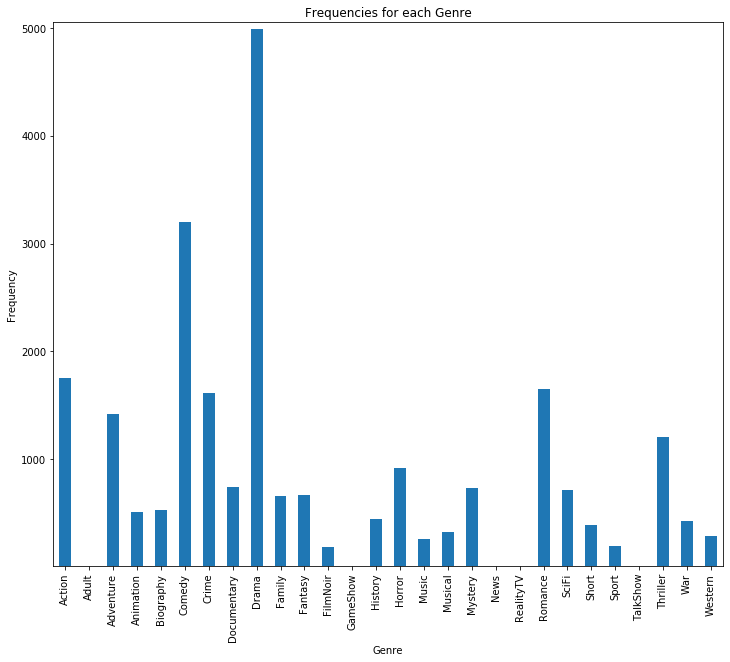

In [12]:
plt.rcParams["figure.figsize"] = [12,10]
df=pd.DataFrame.from_dict(frequency, orient="index")
df.plot(kind='bar',  ylim=(10,5050), legend = False, title='Frequencies for each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

#### Corelation Matrix

Movies can have more than genre and in the curren dataset most movies have more than genre. We can find the relationship between them.
There is some corelation between Animation and Family, Short filems and Documentary, Sci-Fi and Horror

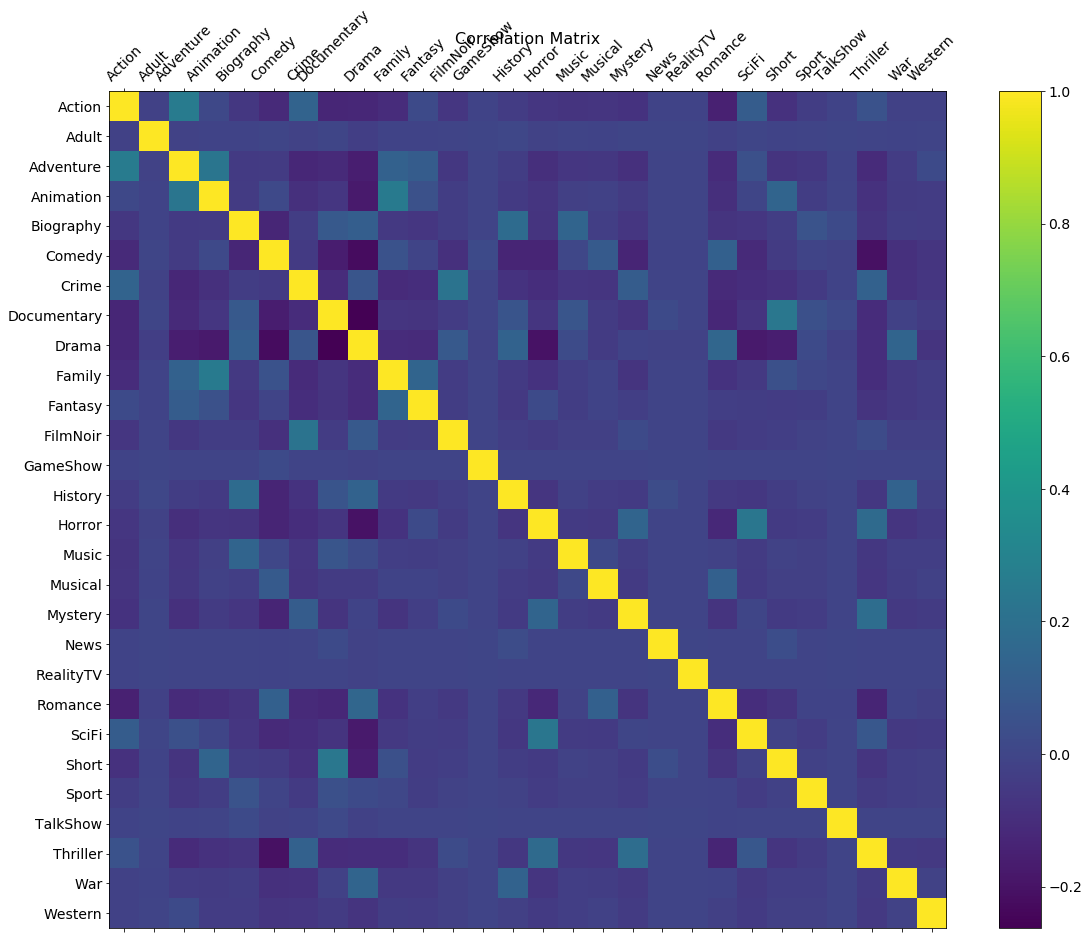

In [13]:
f = plt.figure(figsize=(19, 15))
plt.matshow(genre.corr(), fignum=f.number)
plt.xticks(range(genre.shape[1]), genre.columns, fontsize=14, rotation=45)
plt.yticks(range(genre.shape[1]), genre.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

There is some corelation between no. of photos and number of user reviews,no. of articles and no. of photos, no. of nominations and number of user reviews

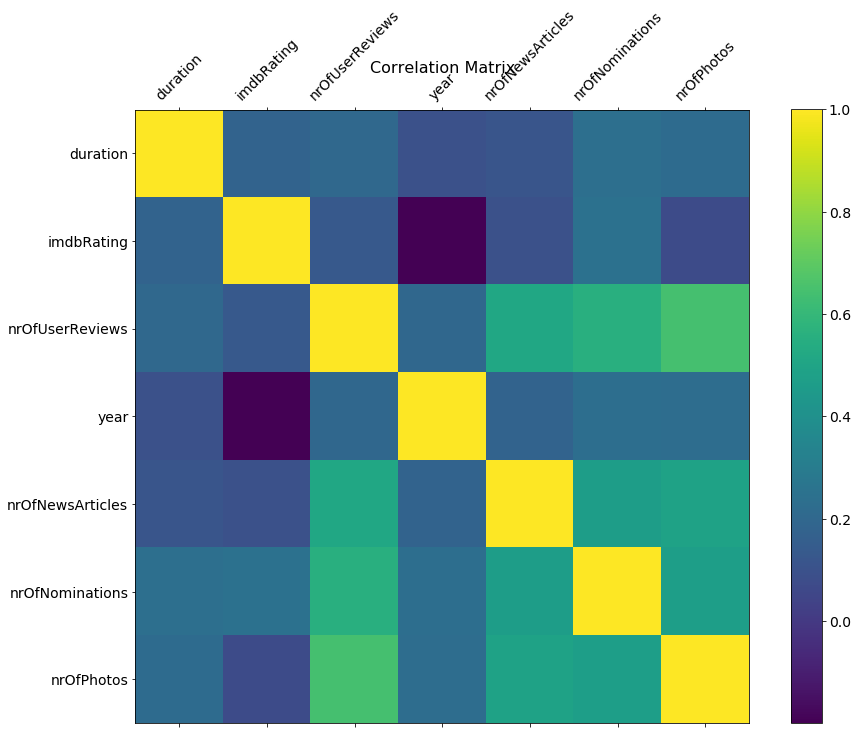

In [14]:
features = shortX[["duration", "imdbRating","nrOfUserReviews","year","nrOfNewsArticles","nrOfNominations","nrOfPhotos"]]
f = plt.figure(figsize=(15, 11))
plt.matshow(features.corr(), fignum=f.number)
plt.xticks(range(features.shape[1]), features.columns, fontsize=14, rotation=45)
plt.yticks(range(features.shape[1]), features.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Modelling - Logistic Regression

#### Preprocess dataset:- Popping title out

In [3]:
shortX.pop('title')
print(shortX.shape)
print(labelsY.shape)

(10097, 10)
(10097, 28)


#### Steps:    
1) Data is split in 70/30 proportion using train_test_split() from sklearn    
2) Using exp() function, C values are generated     
3) Used predict() of Logistic Regression to predict y values   
4) Used Hamming loss and score function to evaluate the performance of the model   
5) Plotted graph of score and hamming loss vs c-values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(shortX, labelsY, test_size=0.3)
x_train.to_csv('/Users/anuradha/Desktop/ML_Project/Movie-Genre-Prediction/imdbmovies/x_test.csv')
y_train.to_csv('/Users/anuradha/Desktop/ML_Project/Movie-Genre-Prediction/imdbmovies/y_train.csv')
x_test.to_csv('/Users/anuradha/Desktop/ML_Project/Movie-Genre-Prediction/imdbmovies/x_test.csv')
y_test.to_csv('/Users/anuradha/Desktop/ML_Project/Movie-Genre-Prediction/imdbmovies/y_test.csv')
print("x_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("x_test.shape",x_test.shape)
print("y_test.shape",y_test.shape)

x_train.shape (7067, 10)
y_train.shape (7067, 28)
x_test.shape (3030, 10)
y_test.shape (3030, 28)


#### C values calculation

In [4]:
C=np.power(np.e, np.random.uniform(0, 1, 10))


#### Logistic Regression 

In [5]:
start_time = time.time()
dict_loss = {}
dict_accuracy = {}
for c in C:
    dict_loss[c] = []
    dict_accuracy[c] = []
    for i in range (5):
        x_train, x_test, y_train, y_test  = train_test_split(shortX, labelsY, test_size=.3)
        lr = OneVsRestClassifier(LogisticRegression(class_weight='balanced', C=c, solver='sag', max_iter = 2500), n_jobs=-1)
        lr.fit(x_train, y_train)
        y_pred = lr.predict(x_test)
        score=lr.score(x_test, y_test)
        hl = hamming_loss(y_test, y_pred)
        dict_loss[c].append(hl)
        dict_accuracy[c].append(score)
        
print("Time to load data: {} seconds".format(time.time() - start_time))

Time to load data: 4101.381327867508 seconds


#### Plotting the graph of Logistic Regression Accuracy and Hamming Loss vs C-Values

  
Hamming Loss for Logistic Regression model without PCA:- 0.3379, which means about 66% of the predictions are correct. The code execution time is quite high due to high volume of data.

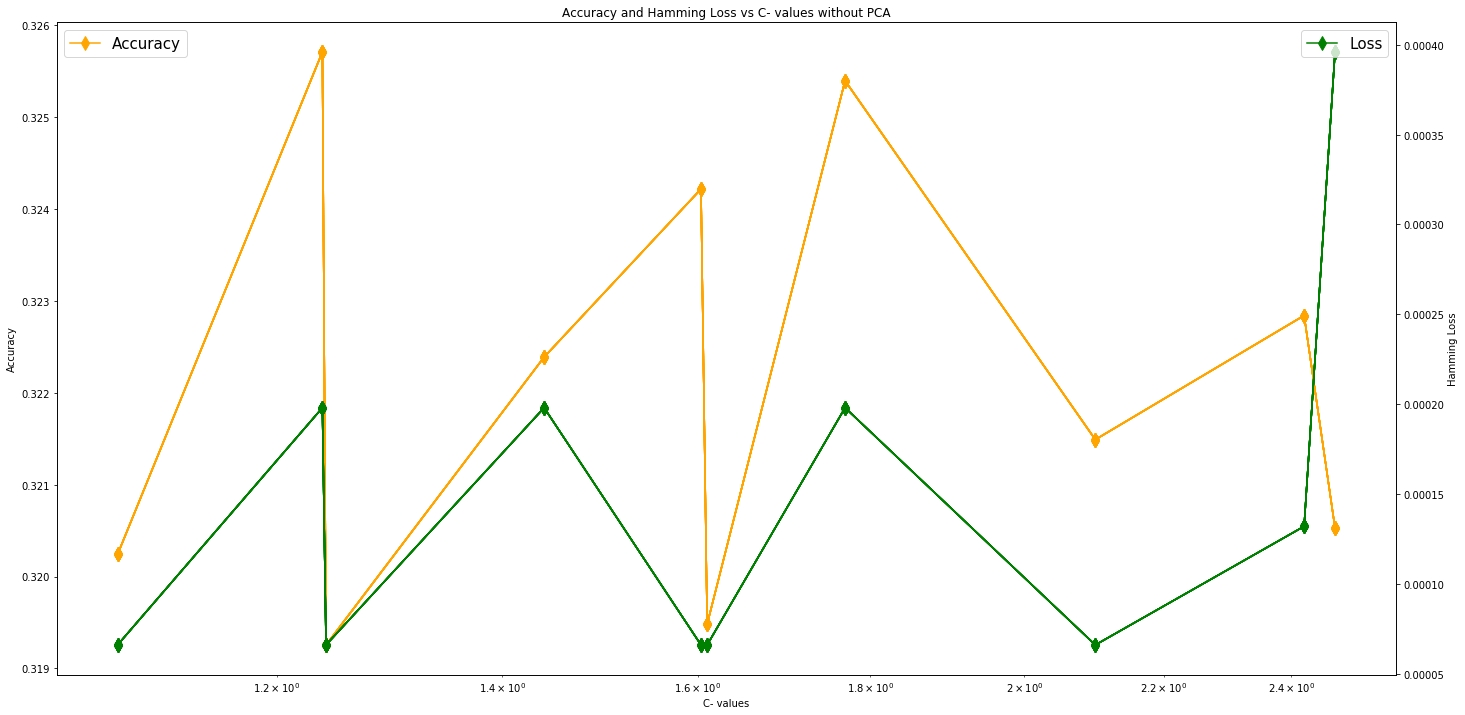

In [6]:
fig, ax = plt.subplots(figsize=(24,12))
ax2 = ax.twinx()
for c, x in dict_loss.items(): 
    avg_loss = {k:np.mean(np.array(v)) for k,v in dict_loss.items()}
    avg_score = {k:np.mean(np.array(v)) for k,v in dict_accuracy.items()}
    list1 = sorted(avg_loss.items())
    list2 = sorted(avg_score.items())
    x_plot, y_plot = zip(*list1)
    ax.plot(x_plot, y_plot, color='orange',marker='d',markersize=10)
    x, y = zip(*list2)
    ax2.plot(x,y, color='green',marker='d',markersize=10)

ax.set_ylabel('Accuracy',fontsize=10)
ax2.set_ylabel('Hamming Loss',fontsize=10)
ax.legend(['Accuracy'],loc=2,fontsize=15)
ax2.legend(['Loss'],loc=1,fontsize=15)
ax.set_xlabel('C- values',fontsize=10)
plt.title("Accuracy and Hamming Loss vs C- values without PCA")
ax.set_xscale('log')
plt.show()

#### Logistic Regression with PCA       
#### Steps:

1) Since performance is not good with the current model, we can use PCA and see if the performance is improved.  
2) Data is split in 70/30 proportion using train_test_split() from sklearn    
3) Using exp() function, C values are generated     
4) Used predict() of Logistic Regression to predict y values   
5) Used Hamming loss and score function to evaluate the performance of the model   
6) Plotted graph of score and hamming loss vs c-values  
7) The model doesnot benefit from using PCA.

In [7]:
start_time = time.time()
pca = PCA(n_components=0.95)

dict_loss_pca = {}
dict_accuracy_pca = {}
for c in C:
    dict_loss_pca[c] = []
    dict_accuracy_pca[c] = []
    for i in range (5):
        x_train, x_test, y_train, y_test  = train_test_split(shortX, labelsY, test_size=.3)
        pca.fit(x_train)
        x_train_reduced = pca.transform((x_train))
        x_test_reduced = pca.transform((x_test))
        lr_pca = OneVsRestClassifier(LogisticRegression(class_weight='balanced', C=c, solver='sag', max_iter = 5000), n_jobs=-1)
        lr_pca.fit(x_train_reduced, y_train)
        y_pred = lr_pca.predict(x_test_reduced)
        score=lr_pca.score(x_test_reduced, y_test)
        hl = hamming_loss(y_test, y_pred)
        dict_loss_pca[c].append(hl)
        dict_accuracy_pca[c].append(score)


print("Time to load data: {} seconds".format(time.time() - start_time))

Time to load data: 86.48804974555969 seconds


#### Plotting the graph of Logistic Regression with PCA Accuracy and Hamming Loss vs C-Values

Hamming Loss for Logistic Regression model with PCA:- 0.5673, which means about 43% of the predictions are correct. 
The execution time of the algorithm is reduced significantly after applying PCA

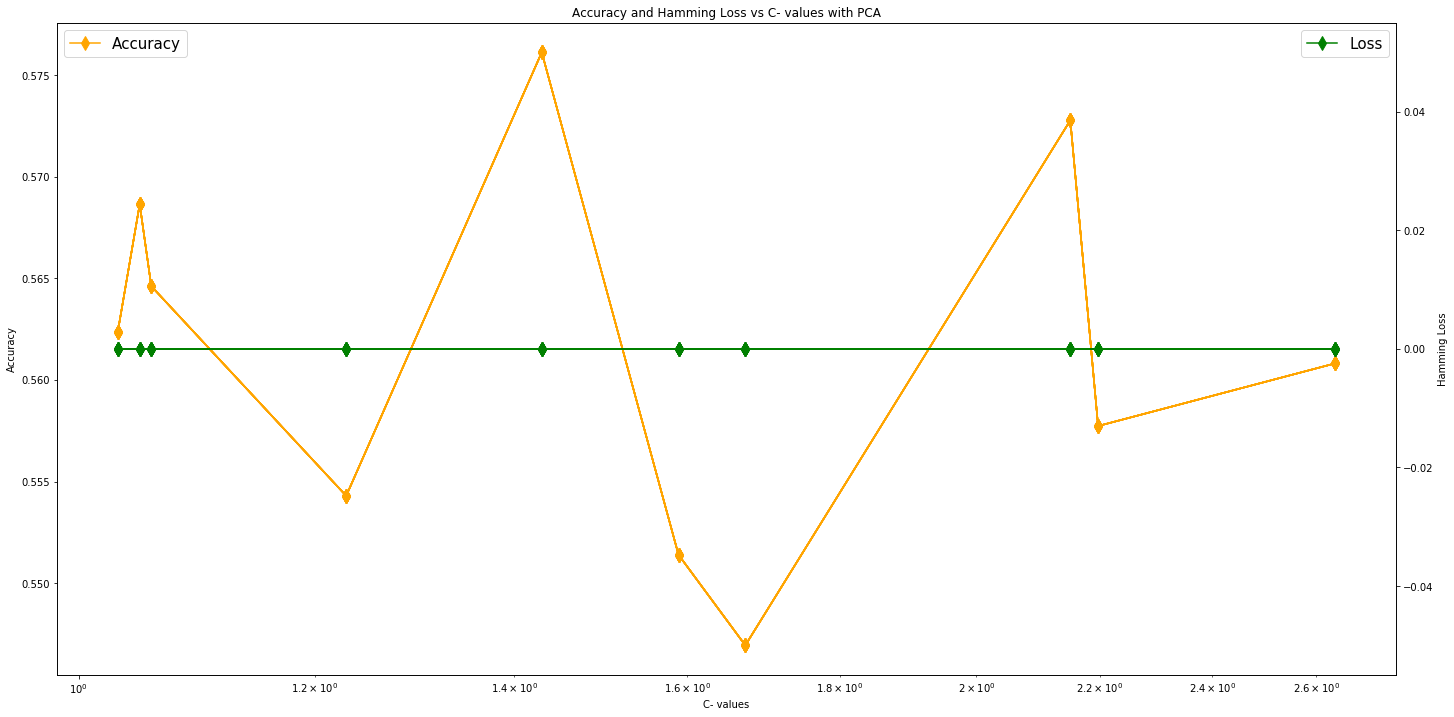

In [24]:
fig, ax = plt.subplots(figsize=(24,12))
ax2 = ax.twinx()
for c, x in dict_loss.items(): 
    avg_loss = {k:np.mean(np.array(v)) for k,v in dict_loss_pca.items()}
    avg_score = {k:np.mean(np.array(v)) for k,v in dict_accuracy_pca.items()}
    list1 = sorted(avg_loss.items())
    list2 = sorted(avg_score.items())
    x_plot, y_plot = zip(*list1)
    ax.plot(x_plot, y_plot, color='orange',marker='d',markersize=10)
    x, y = zip(*list2)
    ax2.plot(x,y, color='green',marker='d',markersize=10)

ax.set_ylabel('Accuracy',fontsize=10)
ax2.set_ylabel('Hamming Loss',fontsize=10)
ax.legend(['Accuracy'],loc=2,fontsize=15)
ax2.legend(['Loss'],loc=1,fontsize=15)
ax.set_xlabel('C- values',fontsize=10)
plt.title("Accuracy and Hamming Loss vs C- values with PCA")
ax.set_xscale('log')
plt.show()